In [1]:
import numpy as np
import pylab as plt

# Mean Field Implementation of the Cortical Microcircuit
### Table of contents
* About this tutorial
* Mean field approximation
    * Fokker-Planck formalism
    * Parameters
    * Task 1 - Verify the equation for $K_{ij}$
    * Define neuron model
    * Define external inputs
    * Task 2 - Define connectivity (number of connections and synaptic efficacy
    * Task 3 - Perform numerical integration
    * Evaluate results
* References

## About this tutorial
The objective of this tutorial is to familiarize you with mean field approximations

## Mean field approximation
Potjans and Diesmann (2014) aggregated connectivity information of local circuits (cortical column) in early visual cortex. They subsequently used this information to simulate a network of $\sim 80000$ leaky integrate-and-fire (LIF) neurons arranged in four layers each with an excitatory and an inhibitory pool. That is quite a feat and simulation of this circuit has led to important insights. However, simulating such a system takes a very long time unless it is performed on a supercomputer. Let's see if we can simulate a mean field approximation of the column model.

<img src="Microcircuit.png"> <img src="Raster.png">

## Fokker-Planck formalism
Following Schuecker et al. (2016), the stationary firing rate $\nu_i$ of each population $i$ are given by

$\nu_i = \Phi[ \mu_i(t),\sigma_i(t)] = \{\tau_r + \tau_m \sqrt{\pi} \int_{\frac{V_{reset}-V_L-\mu_i(t)}{\sigma_i(t)} + \gamma \sqrt{\frac{\bar{\tau_s}}{\tau_m}}}^{\frac{\theta-V_L-\mu_i(t)}{\sigma_i(t)} + \gamma \sqrt{\frac{\bar{\tau_s}}{\tau_m}}} e^{x^2} (1 + erf(x))dx\}^{-1}$

where $\gamma = \frac{|\zeta(\frac{1}{2})|}{\sqrt{2}}$, with $\zeta$ denoting the Rieman zeta function and $erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}dt$ is the error function. The mean drive $\mu_i(t)$ as well as the diffusive noise $\sigma_i^2(t)$ depend on recurrent and external inputs:

$$\mu_i(t) = \tau_m (\sum_j \hat{K}_{ij} w_{ij} \nu_j + K_{ext} w_{ext} \nu_{ext})$$

$$\sigma_i^2(t) = \tau_m (\sum_j \hat{K}_{ij} w_{ij}^2 \nu_j + K_{ext} w_{ext}^2 \nu_{ext})$$

where $\hat{K}_{ij}$ is the average number of synapses arriving at pool $i$ from pool $j$ and $w_{ij}$ is the corresponding synaptic efficacy. Note that both $\mu$ and $\sigma$ are in units of mV.

## Parameters
Neuron model parameters are summarized in the table below

<img src="Parameters.png">

The following table contains information on the local circuit

<img src="Network.png">

The connectivity is given in terms of probabilities that a neuron in the target population receives a synapse from the source population. The equation for this probability is given by

$$P_{ij} = 1 - (1 - \frac{1}{N^j N^i})^{K_{ij}}$$

where $K_{ij}$ is the number of synapses from population $j$ to population $i$ and $N^j$ and $N^i$ are the number of pre- and postsynaptic neurons, respectively. The number of synapses is correspondingly given by

$$K_{ij} = \frac{ln(1-P_{ij})}{ln(1 - \frac{1}{N^j N^i})}$$

## Task 1 - Verify the equation for $K_{ij}$ - (33 points)

Solve $P_{ij} = 1 - (1 - \frac{1}{N^j N^i})^{K_{ij}}$ for $K_{ij}$.

$$P_{ij} - 1 = -(1 - \frac{1}{N^j N^i})^{K_{ij}}$$
$$ln(1 - P_{ij}) = ln((1 - \frac{1}{N^j N^i})^{K_{ij}})$$
$$ln(1 - P_{ij}) = {K_{ij}ln((1 - \frac{1}{N^j N^i})})$$
$${K_{ij} = \frac{ln(1 - P_{ij})}{ln(1 - \frac{1}{N^j N^i})})}$$

In [2]:
# Define neuron model
J = 87.8        # synaptic strength (pA)
g = -4          # relative inhibitory synaptic strength
tau_s = 0.5e-3  # postsynaptic current time constant (s)
tau_m = 10e-3   # membrane time constant (s)
tau_r = 2e-3    # refractory period
C_m = 250       # membrane capacitance (pF)
V_reset = -65   # reset potential (mV)
V_L = -65       # leak potential (mV)
theta = -50     # threshold potential (mV)

# Define external inputs
K_ext = np.array(   # number of external connections
    [1600, 1500, 2100, 1900, 2000, 1900, 2900, 2100])

nu_ext = 8  # firing rate per connection (Hz)

## Task 2 - Define connectivity (number of connections $K$ and synaptic efficacy $W$ - 34 points)
Note that synaptic strength and synaptic efficacy are not the same. You will need to calculate $W$ bassed on other information you have. You also need to calculate the number of connections $K_{ij}$ between pools $i$ and $j$. Importantly, we are interested in the total number of connections received by pool $i$ from pool $j$, not in the number of connections received per neuron in pool $i$!

In [8]:
N.shape

(8,)

In [9]:
P.shape

(8, 8)

In [14]:
a = np.zeros((3,3,))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
K = np.zeros((8,8,))
for i in range(8):
    for j in range(8):
        K_ij = np.log(1-P[i,j])/np.log(1-(1/(N[j]*N[i])))
        K[i,j] = K_ij

<AxesSubplot:>

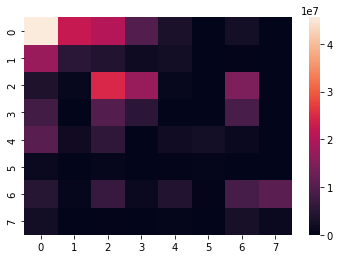

In [19]:
sns.heatmap(K)

In [193]:
N = np.array(    # number of neurons
    [20683, 5834, 21915, 5479, 4850, 1065, 14395, 2948])
P = np.array(   # connection probability
    [[0.101, 0.169, 0.044, 0.082, 0.032, 0.0,    0.008, 0.0],
    [0.135,  0.137, 0.032, 0.052, 0.075, 0.0,    0.004, 0.0],
    [0.008,  0.006, 0.050, 0.135, 0.007, 0.0003, 0.045, 0.0],
    [0.069,  0.003, 0.079, 0.160, 0.003, 0.0,    0.106, 0.0],
    [0.100,  0.062, 0.051, 0.006, 0.083, 0.373,  0.020, 0.0],
    [0.055,  0.027, 0.026, 0.002, 0.060, 0.316,  0.009, 0.0],
    [0.016,  0.007, 0.021, 0.017, 0.057, 0.020,  0.040, 0.225],
    [0.036,  0.001, 0.003, 0.001, 0.028, 0.008,  0.066, 0.144]])

# number of connections
K_hat = K

W_exc = (1/C_m) * J # pV
W_inh = g * W_exc #mV

W_ext = W_exc                        # external input (excitatory)
W_rec = np.tile([W_exc,W_inh],[8,4]) # recurrent synaptic connectivity matrix

In [194]:
W_exc

0.3512

<AxesSubplot:>

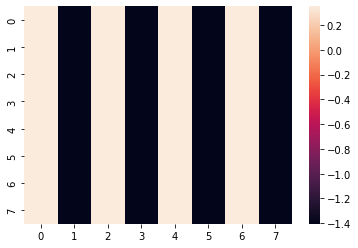

In [195]:
sns.heatmap(W_rec)

In [196]:
# import seaborn as sns
# sns.heatmap(P)

## Task 3 - Perform numererical integration - 33 points
We can now finally find the stationary firing rates of all interacting pools by numerically integrating $\dot{\nu}_i = -\nu_i + \Phi[ \mu_i(t), \sigma_i(t) ]$. You can use the forward Euler method with a timestep $\Delta t = 0.001$ to do so. Make sure to simulate sufficiently many time steps for the system to reach equilibrium ($\sim 5000$ should do the trick). You do not need to define the activation function $\Phi$, it comes with the materials for this tutorial (phi.py).

In [369]:
nr_steps = 5000
delta_t = 0.00001

In [370]:
V = np.zeros([K.shape[0], nr_steps])

In [371]:
V.shape

(8, 5000)

In [372]:
#phi.phi([1,2],[3,4])

In [373]:
K.shape[0]

8

In [374]:
K*W_exc

array([[ 1.59962423e+07,  7.84513943e+06,  7.16302734e+06,
         3.40509626e+06,  1.14578447e+06, -0.00000000e+00,
         8.39871199e+05, -0.00000000e+00],
       [ 6.14581730e+06,  1.76120435e+06,  1.46034532e+06,
         5.99473238e+05,  7.74716991e+05, -0.00000000e+00,
         1.18212290e+05, -0.00000000e+00],
       [ 1.27862297e+06,  2.70221441e+05,  8.65163243e+06,
         6.11564779e+06,  2.62216637e+05,  2.45941597e+03,
         5.10129120e+06, -0.00000000e+00],
       [ 2.84545087e+06,  3.37283999e+04,  3.47033987e+06,
         1.83817768e+06,  2.80395507e+04, -0.00000000e+00,
         3.10368338e+06, -0.00000000e+00],
       [ 3.71182645e+06,  6.36031763e+05,  1.95400291e+06,
         5.61636004e+04,  7.15806354e+05,  8.46807681e+05,
         4.95356064e+05, -0.00000000e+00],
       [ 4.37629425e+05,  5.97261186e+04,  2.15936915e+05,
         4.10270255e+03,  1.12244187e+05,  1.51288346e+05,
         4.86765706e+04, -0.00000000e+00],
       [ 1.68654305e+06,  2.071834

In [375]:
# def mu(t, i):
#     mu = 0
#     for j in range(K.shape[0]):
#         mu += K[
from numpy.linalg import matrix_power
from phi import phi

In [376]:
V[4, 1:100] = 10

In [377]:
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<AxesSubplot:>

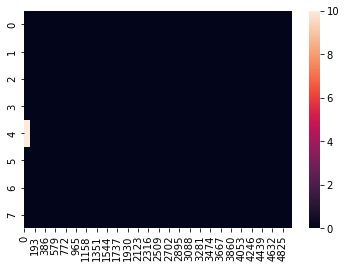

In [378]:
sns.heatmap(V)

In [379]:
V = np.zeros([K.shape[0], nr_steps])
V[4, 0] = 10

<AxesSubplot:>

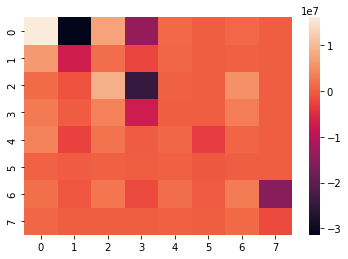

In [380]:
sns.heatmap(K*W_rec)

In [381]:
np.min(K*W_rec)

-31380557.738546945

<AxesSubplot:>

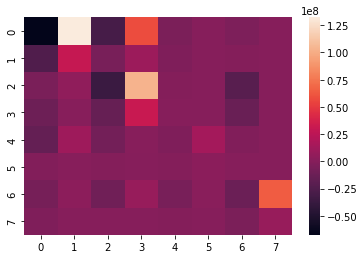

In [382]:
sns.heatmap(K*matrix_power(W_rec, 2))

In [383]:
arr = np.matmul(K*matrix_power(W_rec, 2), V[:, 0])
np.isnan(arr).any()

False

In [397]:
### Write your code here

#nr_steps = 3
nr_steps = 2
for t in range(1, nr_steps):
    #mu = tau_m * np.matmul(K*W_rec, V[:, t-1]) + np.matmul(K_ext*W_ext*nu_ext)
    mu = tau_m * (np.matmul(K*W_rec, V[:, t-1]) + K_ext*W_ext*nu_ext)
    sigma_squared = tau_m * (np.matmul(K * np.square(W_rec), V[:, t-1]) + K_ext*W_ext*W_ext*nu_ext)
    #print(sigma_squared)
    #sigma = np.sqrt(sigma_squared)
    
    print(mu)
    print(sigma_squared)
    phi_val = phi(mu, sigma)
    print(phi_val)
    dV = -V[:, t-1] + phi(mu, sigma)
    V[:, t] = V[:, t-1] + delta_t * dV

[114623.40103525  77513.84311691  26280.66525944   2857.33746753
  71636.82735139  11277.80105963 143982.73768339  14319.47734912]
[40255.73844358 27222.86170266  9229.76963911  1003.4969186
 25158.85376581  3960.76373214 50566.73747441  5029.00044501]
[ 0. nan nan nan nan nan nan nan]


In [396]:
phi(np.arange(8), np.arange(8))

array([0.00000000e+00, 2.38091079e-90, 1.01465064e-20, 2.84413496e-08,
       4.99433375e-04, 4.35209159e-02, 5.06865608e-01, 2.38947690e+00])

In [385]:
phi(

SyntaxError: unexpected EOF while parsing (907045649.py, line 1)

In [ ]:
#sns.heatmap(np.log(V+0.000001))
sns.heatmap(V)

In [ ]:
V 

In [ ]:
K_ext*W_ext*nu_ext

In [ ]:
K_ext

In [ ]:
W_ext

## Evaluate results
As a last step, we need to check if the mean firing rates we obtained using the mean field approximation look anything like the results Potjans & Diesmann (2014) obtained when simulating their full model. Assuming that you called the firing rate variable keeping track of the firing rates $\nu$ and that pools are along its rows and time along its columns, the following code plots bar graphs showing the firing rate in all pools.

In [ ]:
V[:,-1]

In [ ]:
plt.figure()
plt.barh(y=np.arange(8), width=V[:,-1],)
plt.yticks([0.5, 2.5, 4.5, 6.5], labels=['L23', 'L4', 'L5', 'L6'])
plt.show()

Compare this to the mean firing rates observed by Potjans & Diesmann (2014)

<img src="Rates.png">

## References
* Potjans TC, Diesmann M. The cell-type specific cortical microcircuit: relating structure and activity in a full-scale spiking network model. Cereb Cortex. 2014 Mar;24(3):785-806. doi: 10.1093/cercor/bhs358. Epub 2012 Dec 2. PMID: 23203991; PMCID: PMC3920768
* Schuecker, J., Schmidt, M., van Albada, S. J., Diesmann, M., & Helias, M. (2017). Fundamental Activity Constraints Lead to Specific Interpretations of the Connectome. PLOS Computational Biology, 13(2), e1005179. https://doi.org/10.1371/journal.pcbi.1005179